# WORLD HAPPINESS REPORT

In [119]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score 
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#Reading the Dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#There are no null values in the dataset

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
# Creating a new column "New Happiness Score" without taking into consideration Standard error and Dystopia residual which will be unreliable for modelling
df['New Happiness Score']=df['Economy (GDP per Capita)']+df['Family']+df['Health (Life Expectancy)']+df['Freedom']+df['Trust (Government Corruption)']+df['Generosity']
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,New Happiness Score
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,5.06958
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,4.85891
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5.03504
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5.05691
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,4.97518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2.79462
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,1.70681
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2.67771
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,1.07152


In [7]:
#Sorting the data acoording to "New Happiness Score"
df=df.sort_values('New Happiness Score',ascending=False)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,New Happiness Score
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,5.06958
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5.05691
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674,5.05456
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5.03504
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,5.02183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,1.62245
130,Malawi,Sub-Saharan Africa,131,4.292,0.06130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,2.80791,1.48459
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,1.27171
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,1.07152


In [8]:
# Dropping columns of low importance 
df.drop(["Country","Region","Happiness Score","Happiness Rank","Standard Error","Dystopia Residual"],inplace=True,axis=1)
df

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,New Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,5.06958
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,5.05691
27,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,5.05456
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,5.03504
8,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,5.02183
...,...,...,...,...,...,...,...
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.62245
130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,1.48459
157,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.27171
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.07152


In [9]:
# Re-indexing
df=df.reset_index()

In [10]:
df.drop(['index'],inplace=True,axis=1)

In [11]:
df

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,New Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,5.06958
1,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,5.05691
2,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,5.05456
3,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,5.03504
4,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,5.02183
...,...,...,...,...,...,...,...
153,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.62245
154,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,1.48459
155,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.27171
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.07152


# Visualization of dataset

# Pair plot

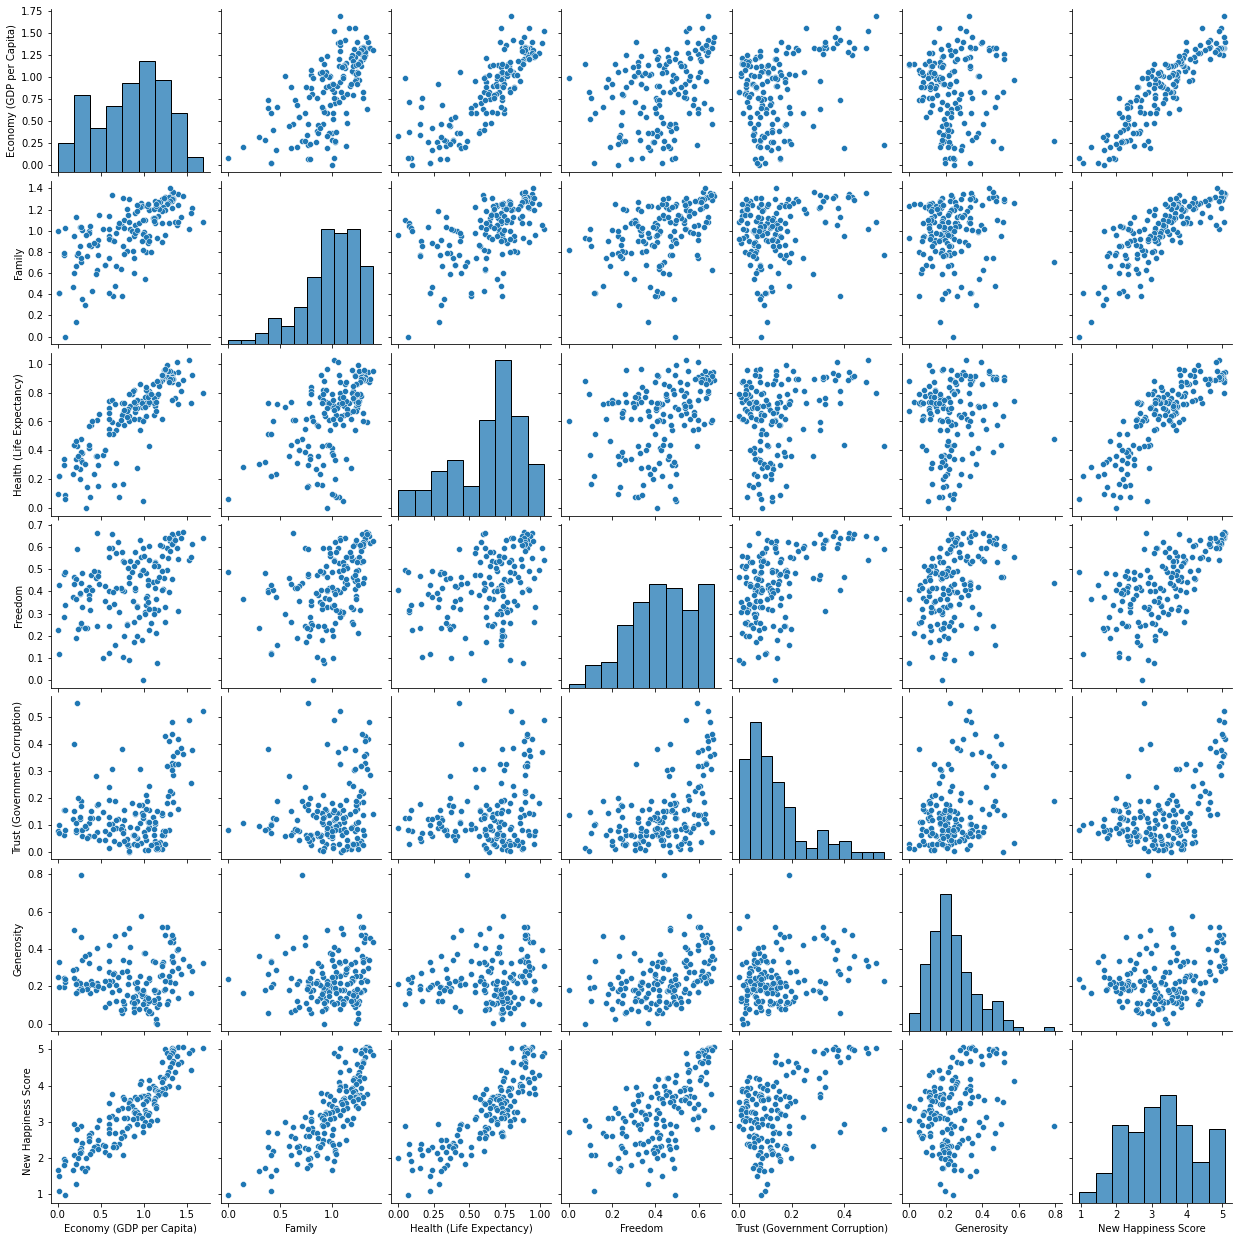

In [12]:
sns.pairplot(df)

# Scatter plot

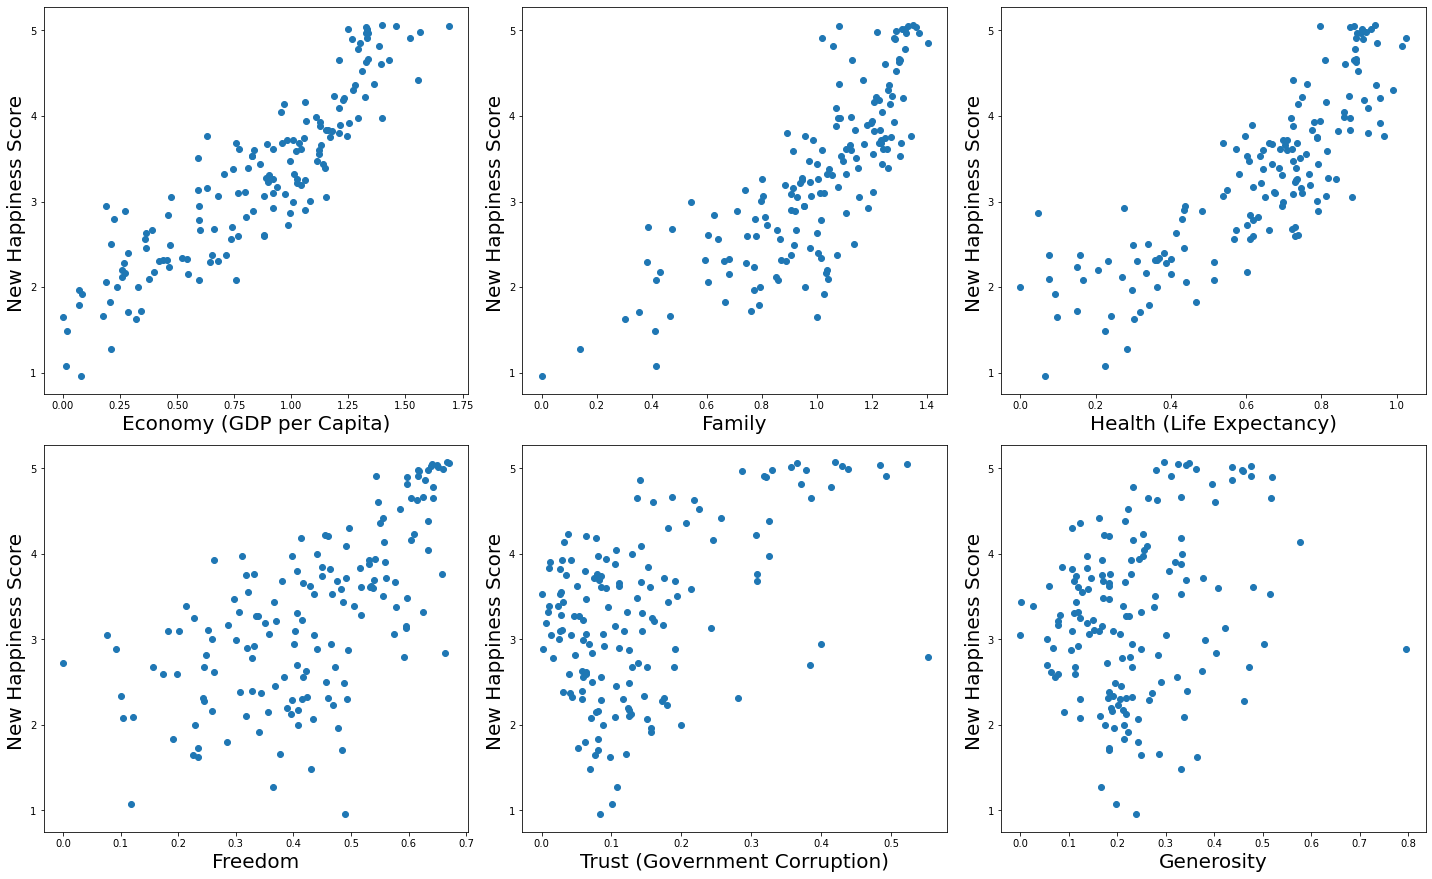

In [13]:
X=df.drop(columns='New Happiness Score')
Y=df[['New Happiness Score']]
plt.figure(figsize=(20,30))
plotnumber=1

for column in X:
    if plotnumber<=10:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('New Happiness Score ',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
# Scatter plot interprets Positive trend between label and features
# Features (Freedom, Trust and Generosity) has positive trend but with high residual rate and outliers.
# Features (Economy, Family and Health) has low residual rate and good positive trend


# Box Plot

Economy (GDP per Capita)            AxesSubplot(0.125,0.657941;0.227941x0.222059)
Family                           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Health (Life Expectancy)         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Freedom                             AxesSubplot(0.125,0.391471;0.227941x0.222059)
Trust (Government Corruption)    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Generosity                       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
New Happiness Score                    AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

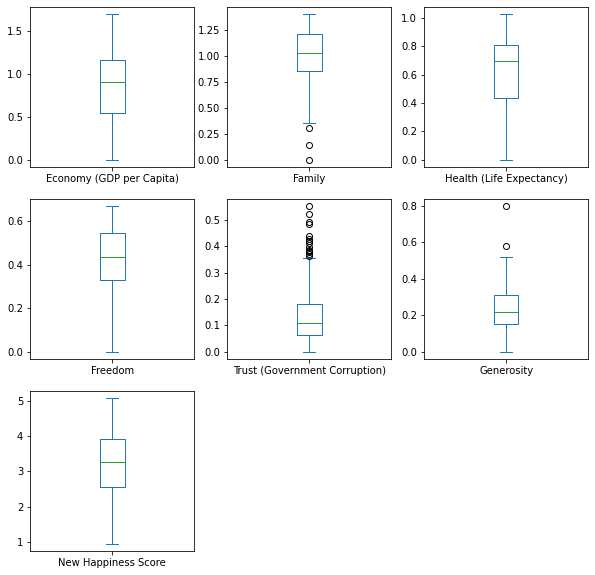

In [15]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

# Dist Plot

In [16]:
from scipy.stats import skew

-0.3145517168794695
-0.9973086936977792
-0.6986145919075787
-0.40952630345169944
1.3722746285872591
0.9924230947758457
0.02873695303734637


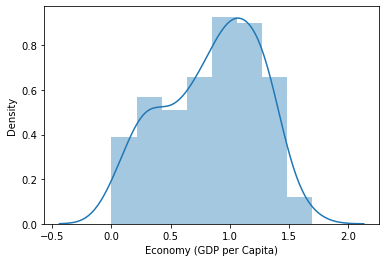

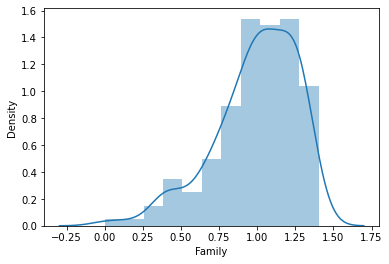

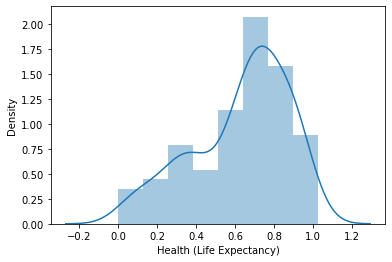

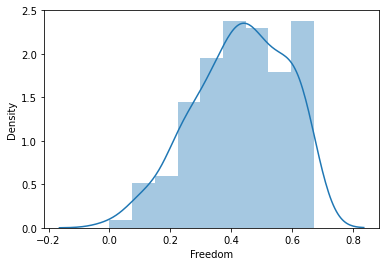

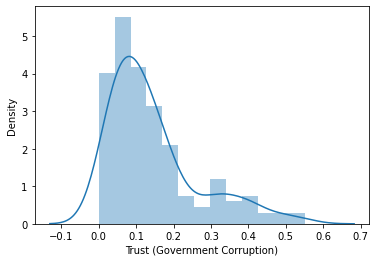

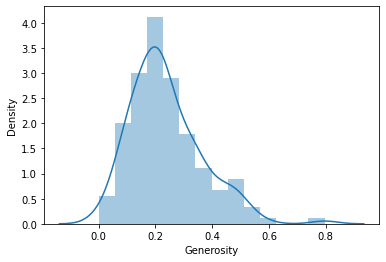

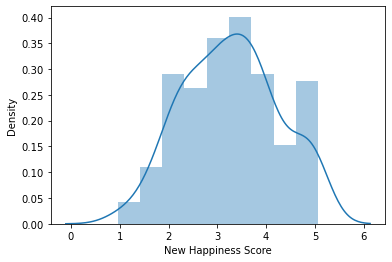

In [17]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [18]:
df.skew()

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
New Happiness Score              0.029013
dtype: float64

In [155]:
# Family is left skewed with outliers
# Trust and Generosity are right skewed with outliers
# Hence applying Power transformation technique to remove skewness

In [20]:
df["Family"]=np.square(df['Family'])
df["Trust (Government Corruption)"]=np.sqrt(df['Trust (Government Corruption)'])
df["Generosity"]=np.sqrt(df['Generosity'])

In [21]:
df.skew()

Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
New Happiness Score              0.029013
dtype: float64

In [22]:
# All the features are under skewness limit -1 to +1 ,hence skewness is removed

In [23]:
# To find corelation using Heatmap and VIF technique
df_corr=df.corr().abs()
df_corr

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,New Happiness Score
Economy (GDP per Capita),1.000000,0.661613,0.816478,0.370300,0.241112,0.043087,0.897034
Family,0.661613,1.000000,0.547457,0.497569,0.195146,0.112091,0.810475
Health (Life Expectancy),0.816478,0.547457,1.000000,0.360477,0.183468,0.069038,0.842187
Freedom,0.370300,0.497569,0.360477,1.000000,0.479812,0.395946,0.633547
Trust (Government Corruption),0.241112,0.195146,0.183468,0.479812,1.000000,0.276274,0.419180
Generosity,0.043087,0.112091,0.069038,0.395946,0.276274,1.000000,0.243624
New Happiness Score,0.897034,0.810475,0.842187,0.633547,0.419180,0.243624,1.000000


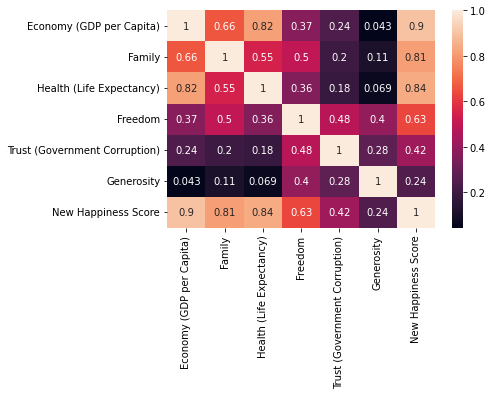

In [24]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [25]:
X=df.drop(columns='New Happiness Score')
Y=df[['New Happiness Score']]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,4.122979,Economy (GDP per Capita)
1,2.091294,Family
2,3.141449,Health (Life Expectancy)
3,1.877255,Freedom
4,1.368141,Trust (Government Corruption)
5,1.306110,Generosity


In [26]:
# All the features have VIF values < 5, therefore selected features have no colinearity between them

# Linear Regression Without Hyperparameter Tuning

In [27]:
sm=smf.ols(formula='Y~X',data=df).fit()

In [28]:
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4898.
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          2.94e-170
Time:                        13:33:07   Log-Likelihood:                 197.58
No. Observations:                 158   AIC:                            -381.2
Df Residuals:                     151   BIC:                            -359.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0902      0.025      3.561      0.000       0.040       0.140
X[0]           1.0176      0.028     35.715      0.000       0.961       1.074
X[1]           0.5749      0.017     33.515      0.000       0.541       0.609
X[2]           1.0397      0.041     25.623      0.000       0.960       1.120
X[3]           0.8867      0.051     17.242      0.000       0.785       0.988
X[4]           0.7275      0.044     16.615      0.000       0.641       0.814
X[5]           0.9185      0.048     18.991      0.000       0.823       1.014
==============================================================================
Omnibus:                       47.493   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.125
Skew:                          -0.838   Prob(JB):                     1.52e-71
Kurtosis:                       9.836   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
scaler=StandardScaler() #Scaling
X_scaled=scaler.fit_transform(X)

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21) #Training Test split

In [31]:
lm=LinearRegression() # Applying Regression
lm.fit(X_train,Y_train) # Fitting the model

LinearRegression()

In [32]:
Y_pred=lm.predict(X_test) # Predicting the Test data
Y_pred_train=lm.predict(X_train) #Predicting the Train data

In [33]:
lm.score(X_train,Y_train)

0.9961624284659588

In [34]:
lm.score(X_test,Y_test)

0.9907911688772619

In [35]:
r2=r2_score(Y_test,Y_pred) #r2_score
r2

0.9907911688772619

In [36]:
cross_scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
cross_scores   

array([0.99724979, 0.9918863 , 0.99539226, 0.99718844, 0.99389651])

In [37]:
cross_scores.mean()

0.9951226577401476

In [38]:
mean_absolute_error(Y_test,Y_pred) #MAE

0.05872740738026476

In [39]:
mean_squared_error(Y_test,Y_pred) #MSE

0.009476958815507247

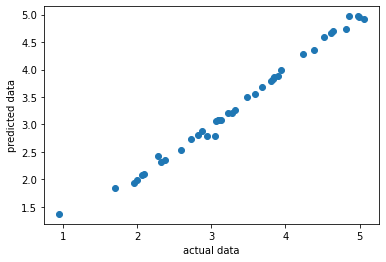

In [40]:
plt.scatter(Y_test,Y_pred) # Relation between actual and predicted data
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [41]:
# R-squared:	0.9907911688772619
# mean_absolute_error= 0.05872740738026476
# mean_squared_error= 0.009476958815507247

# Linear Regression Using Ridge Regression

In [42]:
ridge=Ridge()

In [43]:
parameters={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)

In [44]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [45]:
print(ridge_regressor.best_params_)

{'alpha': 1}


In [46]:
print(ridge_regressor.best_score_)

0.9951322834974798


In [47]:
Y_pred=ridge_regressor.predict(X_test)
Y_pred_train=ridge_regressor.predict(X_train)

In [48]:
ridge_regressor.score(X_train,Y_train)

0.9961432178747218

In [49]:
ridge_regressor.score(X_test,Y_test)

0.9907269938976416

In [50]:
r2=r2_score(Y_test,Y_pred)
r2

0.9907269938976416

In [51]:
cross_scores = cross_val_score(ridge_regressor, X_train, Y_train, scoring='r2', cv=5)
cross_scores   

array([0.99703638, 0.9918863 , 0.99539202, 0.99718862, 0.9938945 ])

In [52]:
cross_scores.mean()

0.995079564467369

In [53]:
mean_absolute_error(Y_test,Y_pred)

0.0587468352372436

In [54]:
mean_squared_error(Y_test,Y_pred)

0.009543002337289982

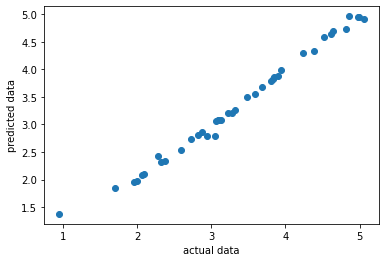

In [55]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [56]:
# R-squared:	0.9907269938976416
# mean_absolute_error= 0.0587468352372436
# mean_squared_error= 0.009543002337289982

# KNN

In [57]:
X=df.drop(columns='New Happiness Score')
Y=df[['New Happiness Score']]

In [58]:
scaler=StandardScaler()

In [59]:
X_scaled=scaler.fit_transform(X)

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [61]:
knn=KNeighborsRegressor()

In [62]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [63]:
Y_pred=knn.predict(X_test)

In [64]:
knn.score(X_train,Y_train)

0.9739930717322991

In [65]:
knn.score(X_test,Y_test)

0.9643874259854931

In [66]:
r2=r2_score(Y_test,Y_pred)
r2

0.9643874259854931

In [67]:
cross_scores = cross_val_score(knn, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.97682967, 0.96480641, 0.9704009 , 0.95994287, 0.94691491])

In [68]:
cross_scores.mean()

0.9637789514677954

In [69]:
mean_absolute_error(Y_test,Y_pred)

0.12861210000000012

In [70]:
mean_squared_error(Y_test,Y_pred)

0.036649482735800015

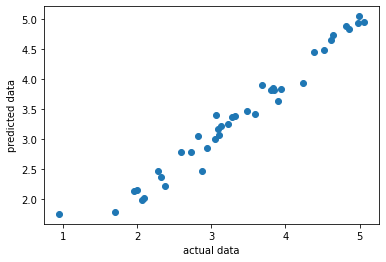

In [71]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [72]:
# R-squared:	0.9643874259854931
# mean_absolute_error= 0.12861210000000012
# mean_squared_error= 0.036649482735800015

# KNN MODEL USING HYPERPARAMETER TUNING

In [73]:
knn=KNeighborsRegressor()

In [74]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [75]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [76]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [77]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [78]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [79]:
clf.score(X_train,Y_train)

0.9709864441616146

In [80]:
clf.score(X_test,Y_test)

0.9571721121404122

In [81]:
r2=r2_score(Y_test,Y_pred)
r2

0.9571721121404122

In [82]:
cross_scores = cross_val_score(clf, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.97682967, 0.96480641, 0.9704009 , 0.95994287, 0.96285172])

In [83]:
cross_scores.mean()

0.9669663148530848

In [84]:
mean_absolute_error(Y_test,Y_pred)

0.14052067857142864

In [85]:
mean_squared_error(Y_test,Y_pred)

0.04407488029596938

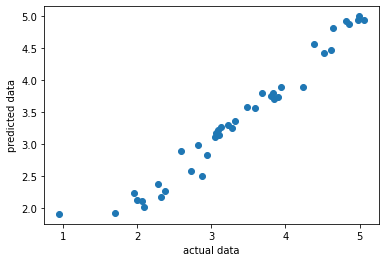

In [86]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [87]:
# R-squared:	0.9571721121404122
# mean_absolute_error= 0.14052067857142864
# mean_squared_error= 0.04407488029596938

# DECISION TREE MODEL

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [89]:
Y_pred=dt.predict(X_test)

In [90]:
dt.score(X_train,Y_train)

1.0

In [91]:
dt.score(X_test,Y_test)

0.8527342332571709

In [92]:
r2=r2_score(Y_test,Y_pred)
r2

0.8527342332571709

In [93]:
cross_scores = cross_val_score(dt, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.90911937, 0.80437   , 0.88312631, 0.93973625, 0.79072778])

In [94]:
cross_scores.mean()

0.8654159424632419

In [95]:
mean_absolute_error(Y_test,Y_pred)

0.27233575000000004

In [96]:
mean_squared_error(Y_test,Y_pred)

0.15155361063250003

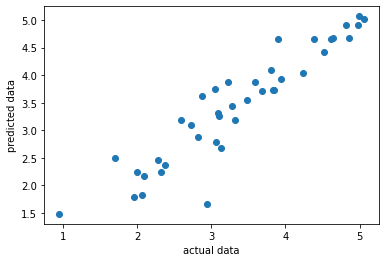

In [97]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [98]:
# R-squared:	0.8391175120827551
# mean_absolute_error= 0.29323274999999993
# mean_squared_error= 0.16556680123750003

# DECISION TREE WITH HYPER PARAMETER TUNING

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [105]:
dt1=DecisionTreeRegressor()

In [106]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':["mse", "friedman_mse", "mae", "poisson"]}

In [107]:
clf1=GridSearchCV(dt1,param_grid,cv=3,n_jobs=-1)

In [108]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [109]:
clf1.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [110]:
Y_pred=clf1.predict(X_test)

In [111]:
clf1.score(X_train,Y_train)


0.9860475284388037

In [112]:
clf1.score(X_test,Y_test)

0.8432961693830865

In [113]:
r2=r2_score(Y_test,Y_pred)
r2

0.8432961693830865

In [114]:
cross_scores = cross_val_score(clf1, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.87941108, 0.73216197, 0.86474437, 0.95335606, 0.80695754])

In [115]:
cross_scores.mean()

0.8473262029477638

In [116]:
mean_absolute_error(Y_test,Y_pred)

0.3189702125

In [117]:
mean_squared_error(Y_test,Y_pred)

0.16126647662392574

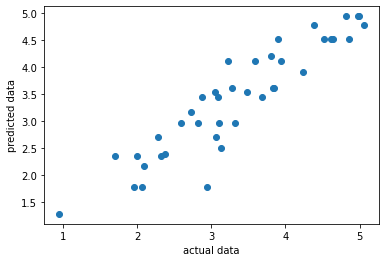

In [118]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [ ]:
# R-squared:	0.8432961693830865
# mean_absolute_error= 0.3189702125
# mean_squared_error= 0.16126647662392574

# GRADIENT BOOSTING

In [120]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [121]:
gbdt=GradientBoostingRegressor()

In [122]:
gbdt.fit(X_train,Y_train)

GradientBoostingRegressor()

In [123]:
Y_pred=gbdt.predict(X_test)

In [124]:
gbdt.score(X_train,Y_train)

0.9996678869089834

In [125]:
gbdt.score(X_test,Y_test)

0.9601412020895698

In [126]:
r2=r2_score(Y_test,Y_pred)
r2

0.9601412020895698

In [127]:
cross_scores = cross_val_score(gbdt, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.95743508, 0.93401223, 0.95838244, 0.97999716, 0.96705482])

In [128]:
cross_scores.mean()

0.9593763477082987

In [129]:
mean_absolute_error(Y_test,Y_pred)

0.14929232580312518

In [130]:
mean_squared_error(Y_test,Y_pred)

0.041019341238658885

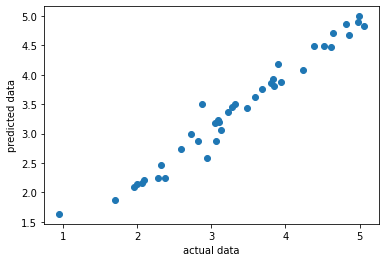

In [131]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [133]:
# R-squared:	0.9601412020895698
# mean_absolute_error= 0.14929232580312518
# mean_squared_error= 0.041019341238658885

# GBDT WITH HYPER PARAMETER

In [134]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [135]:
gbdt1=GradientBoostingRegressor()

In [136]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}

In [137]:
clf1=GridSearchCV(gbdt1,param_grid,cv=3,n_jobs=-1)

In [138]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [139]:
clf1.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8}

In [140]:
Y_pred=clf1.predict(X_test)

In [141]:
clf1.score(X_train,Y_train)


0.9993746304413962

In [142]:
clf1.score(X_test,Y_test)

0.9640624226588188

In [143]:
r2=r2_score(Y_test,Y_pred)
r2

0.9640624226588188

In [144]:
cross_scores = cross_val_score(clf1, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.95784757, 0.91359376, 0.96926225, 0.96808951, 0.96209313])

In [145]:
cross_scores.mean()

0.9541772448274323

In [146]:
mean_absolute_error(Y_test,Y_pred)

0.14266604615942236

In [147]:
mean_squared_error(Y_test,Y_pred)

0.036983948978121496

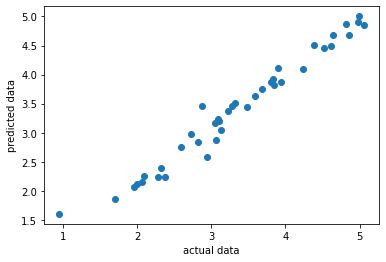

In [148]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [149]:
# R-squared:	0.9640624226588188
# mean_absolute_error= 0.14266604615942236
# mean_squared_error= 0.036983948978121496

# Conclusion

In [153]:
# 1. 4 models were fitted on the dataset mainly Linear regression,KNN, Decision tree & GBDT without and with Hypertparameter Tuning
# 2. Among the models the optimized Result was achieved using Linear Regression without hyperparameter tuning
# 3. Result:
    # Model: Linear regression
    # R-squared:	0.9907911688772619
    # mean_absolute_error= 0.05872740738026476
    # mean_squared_error= 0.009476958815507247
        

In [154]:
md=[lm,knn,dt,gbdt] # Saving
import pickle
filename="World Happiness Report.pkl"
pickle.dump(md,open(filename,"wb"))